In [1]:
import random
import numpy as np

def random_pos(size):
    pos = {}
    for i in range(size):
        pos[i] = (random.random(), random.random())
    return pos

def intersect(edge1_1, edge1_2, edge2_1, edge2_2):
    dx1, dx2 = edge1_2[0] - edge1_1[0], edge2_2[0] - edge2_1[0]
    dy1, dy2 = edge1_2[1] - edge1_1[1], edge2_2[1] - edge2_1[1]
    a = [[dx1, -dy1], [dx2, -dy2]]
    b = [(dx1 * edge1_1[1]) - (dy1 * edge1_1[0]), (dx2 * edge2_1[1]) - (dy2 * edge2_1[0])]
    point = np.linalg.solve(a, b)[::-1]
    x_bool_1 = min(edge1_1[0], edge1_2[0]) <= point[0] <= max(edge1_1[0], edge1_2[0])
    y_bool_1 = min(edge1_1[1], edge1_2[1]) <= point[1] <= max(edge1_1[1], edge1_2[1])
    x_bool_2 = min(edge2_1[0], edge2_2[0]) <= point[0] <= max(edge2_1[0], edge2_2[0])
    y_bool_2 = min(edge2_1[1], edge2_2[1]) <= point[1] <= max(edge2_1[1], edge2_2[1])
    return x_bool_1 and y_bool_1 and x_bool_2 and y_bool_2

def random_planar_edges(pos):
    possible_edges = []
    for i in range(len(pos)):
        for j in range(len(pos)):
            if not i == j:
                possible_edges.append((i, j))

    edges = []
    while len(possible_edges) > 0:
        edge = possible_edges.pop(random.randint(0, len(possible_edges) - 1))
        add = True
        for i in edges:
            if edge[0] == i[1] and edge[1] == i[0]:
                add = False
                break
            if intersect(pos[i[0]], pos[i[1]], pos[edge[0]], pos[edge[1]]):
                add = False
                break
        if add:
            edges.append(edge)
    return edges

In [2]:
nodes = list(range(100))
pos = random_pos(len(nodes))
edges = random_planar_edges(pos)

In [3]:
import networkx as nx

g = nx.Graph()
g.add_nodes_from(nodes)
g.add_edges_from(edges)

In [4]:
def get_neighbors(vertex, edges):
    neighbors = []
    for i in edges:
        if i[0] == vertex:
            neighbors.append(i[1])
        elif i[1] == vertex:
            neighbors.append(i[0])
    return neighbors

def different_color(neighbors, color_map):
    colors = [True] * 6
    neighbor_colors = [color_map[i] for i in neighbors]
    for i in neighbor_colors:
        colors[i] = False
    for i in range(6):
        if colors[i] == True:
            return i

def remove_edges(vertex, edges):
    to_remove = []
    for i in range(len(edges)):
        if edges[i][0] == vertex:
            to_remove.append(i)
        elif edges[i][1] == vertex:
            to_remove.append(i)
    for i in to_remove[::-1]:
        edges.pop(i)

In [5]:
def six_color_recursion(nodes, edges, color_map):
    if len(nodes) == 1:
        color_map[nodes[0]] = 0
    else:
        for i in range(len(nodes)):
            neighbors = get_neighbors(nodes[i], edges)
            if len(neighbors) < 6:
                vertex = nodes.pop(i)
                remove_edges(vertex, edges)
                six_color_recursion(nodes, edges, color_map)
                color_map[vertex] = different_color(neighbors, color_map)
                break
                
def six_color(n, e):
    nodes = n.copy()
    edges = e.copy()
    color_map = [None] * len(nodes)
    six_color_recursion(nodes, edges, color_map)
    return color_map

In [6]:
colors = ['red', 'green', 'blue', 'yellow', 'purple', 'orange']
color_map = [colors[i] for i in six_color(nodes, edges)]

/Users/albertwang/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/albertwang/anaconda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/albertwang/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/albertwang/anaconda/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.w

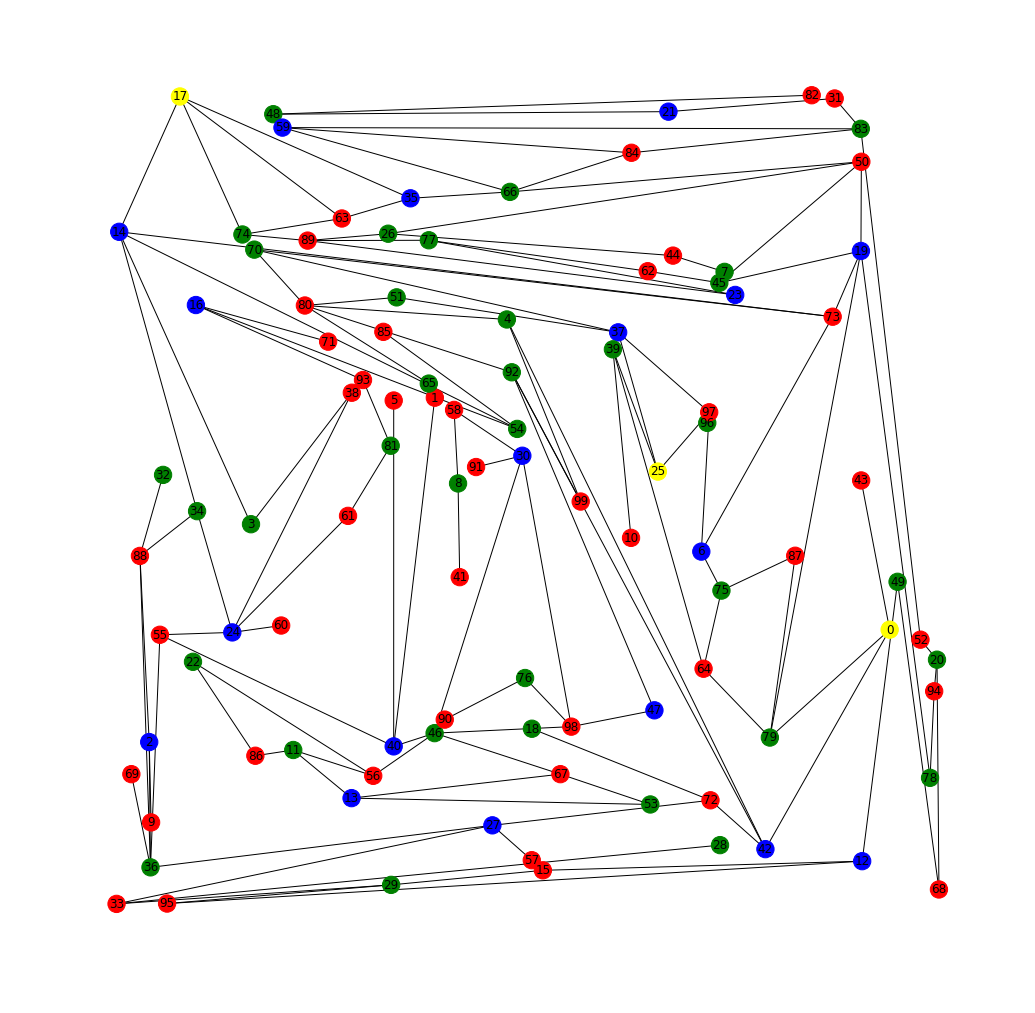

In [8]:
import matplotlib.pyplot as plt

fig_size = plt.rcParams['figure.figsize'] = [18, 18]
plt.axes().set_aspect('equal')
nx.draw(g, pos, node_color=color_map, with_labels=True)
plt.savefig('random_planar_6_colors.png', dpi=300)
plt.show()